## **Video Sustentativo**

#### https://youtu.be/1i95ORhM5S8

## **Entrega Tercer Laboratorio**
**Nombre: Miguel Angel Puerta Vasquez**

**ID: 1000760164**



## **Analisis de pi**

Para la entrega de esta parte se recopilo los resultados de 3 ejecuciones de cada prueba del programa, estos se guardaron en un archivo .csv para cargarlos y analizarlos en este laboratorio.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo de tiempos
df = pd.read_csv('times.csv')

# Mostrar los datos crudos
print('Datos crudos:')
display(df)

Datos crudos:


,mode,n_threads,time_s
0,serial,1,13.960192
1,serial,1,8.698511
2,serial,1,8.968333
3,parallel,1,9.061999
4,parallel,1,7.864246
5,parallel,1,8.358509
6,parallel,2,4.138371
7,parallel,2,4.069681
8,parallel,2,4.147693
9,parallel,3,3.047179


Como pedimos ver se tienen 3 resultados para cada prueba, a su vez se ejecuto la prueba en paralela con 1, 2, 3, 4 y 8 hilos a la vez, esto se debe a la baja cantidad de hilos que permite el PC por nucleo, que solo permite 1.

Se priorizo ejecutar 3 veces por prueba para minimizar diferencias generadas por una primera ejecucion de un hilo y permitir un analisis mas correcto y que no exista desbalanceo por ejecuciones multiples.

### **Evaluacion de T*s***

El tiempo serial que hemos obtenido de las 3 pruebas tiene un decente nivel de diferencia entre ellas, por tanto le daremos los mejores resultados obtenidos al tiempo seria y usaremos el menor tiempo obtenido de los 3, eso para una mejor comparacion contra los metodos paralelos.

In [ ]:
# Calcular T_s: tomamos el mínimo entre repeticiones serial como T_s
serial_times = df[df['mode'] == 'serial']['time_s'].astype(float)
Ts = serial_times.min()
print(f"Ts (usando mínimo entre repeticiones) = {Ts:.6f} s\n")

Ts (usando mínimo entre repeticiones) = 8.698511 s



### **Evaluacion de T*p***

El tiempo paralelo tambien posee 3 resultados por prueba, en el caso de los tiempos paralelos, usaremos la mediana en vez de promedios, ya que en este caso la primera ejecucion tiende a tomar mas tiempo que las ejecuciones en promedio, principalmente por necesidad de tener que iniciar el hilo por primera vez.

In [ ]:
# Calcular T_p(N): utilizar la mediana por cada número de hilos para mayor robustez
parallel = df[df['mode'] == 'parallel'].copy()
parallel['time_s'] = parallel['time_s'].astype(float)

grouped = parallel.groupby('n_threads')['time_s'].agg(['count','min','median', 'max']).reset_index().rename(columns={'median':'median_time'})
display(grouped)

,n_threads,count,min,median_time,max
0,1,3,7.864246,8.358509,9.061999
1,2,3,4.069681,4.138371,4.147693
2,3,3,2.952175,2.997082,3.047179
3,4,3,2.252268,2.316750,2.340979
4,8,3,2.361367,2.378814,3.259430


### **Tabla de resultados**

Ahora crearemos la tabla de resultados usando el Ts elegido anteriormente y los tiempos mediana obtenidos anteriormente para calcular el Speedup y Efficiency

In [ ]:
# Elegimos median_time como Tp(N)
grouped = grouped.set_index('n_threads')
Tp = grouped['median_time']

# Construir tabla resumen
results = pd.DataFrame({'N (threads)': Tp.index.astype(int), 'Tp (seconds)': Tp.values.astype(float)})
results = results.sort_values('N (threads)').reset_index(drop=True)
results['Speedup'] = Ts / results['Tp (seconds)']
results['Efficiency'] = results['Speedup'] / results['N (threads)']

print('\nTabla de resultados:')
display(results)


Tabla de resultados:


,N (threads),Tp (seconds),Speedup,Efficiency
0,1,8.358509,1.040677,1.040677
1,2,4.138371,2.101917,1.050958
2,3,2.997082,2.902327,0.967442
3,4,2.316750,3.754618,0.938655
4,8,2.378814,3.656659,0.457082


### **Grafico de Speedup**

Finalmente creamos un grafico con los resultados obtenidos de Speedup y lo evaluamos contra el numero de hilos.

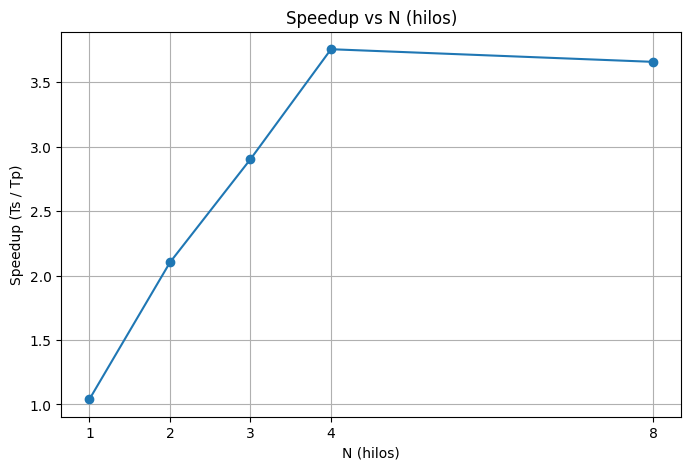

In [ ]:
# Guardar resumen para referencia
results.to_csv('results_pi.csv', index=False)

# Gráfico Speedup
plt.figure(figsize=(8,5))
plt.plot(results['N (threads)'], results['Speedup'], marker='o')
plt.xlabel('N (hilos)')
plt.ylabel('Speedup (Ts / Tp)')
plt.title('Speedup vs N (hilos)')
plt.grid(True)
plt.xticks(results['N (threads)'])
plt.savefig('speedup_pi.png', dpi=150, bbox_inches='tight')
plt.show()

Como podemos ver el Speedup incrementa linealmente con cada hilo creado hasta que se llega al maximo permitido por el sistema, que en este caso es 4, de aqui en adelante, no importan cuantos mas hilos agreguemos, estos tendran un rendimiento relativamente similar al maximo de hilos o menor a este.

### **Análisis de Resultados (Parte 1)**


#### **Comparacion rendimiento Tp(1) y Ts**

In [ ]:
display(df.head(6))

,mode,n_threads,time_s
0,serial,1,13.960192
1,serial,1,8.698511
2,serial,1,8.968333
3,parallel,1,9.061999
4,parallel,1,7.864246
5,parallel,1,8.358509


Como podemos ver la version paralela se ejecuta ligeramente mas rapida que la version serial, esto se puede deber a que el hulo poseia un estado cache mas nuevo que permitiera el trabajo mas rapido, tambien se puede deber a la manera en la que el compilador interactua con estos trabajos.
Aunque se esperaria que el serial fuera un poco mejor por el overhead y inicio temprano sin necesidad de crear hilos, eso no fue lo que ocurrio en mi caso.

#### **Analisis Speedup**

In [ ]:
display(results[['N (threads)', 'Speedup']])

,N (threads),Speedup
0,1,1.040677
1,2,2.101917
2,3,2.902327
3,4,3.754618
4,8,3.656659


como se puede notar el incremento por nucleo es lineal, he incrementa aproximadamente en una unidad por cada hilo nuevo creado, aunque este incremento disminuye cuantos mas hilos creemos, ademas de esto crear 8 hilos cuando el sistema solo permite un maximo de 4 lleva a que no se genere una mejoria en el procesamiento he incluso lleva a una ligera disminucion del rendimiento.

#### **Tendencia eficiencia**

In [ ]:
display(results[['N (threads)', 'Efficiency']])

,N (threads),Efficiency
0,1,1.040677
1,2,1.050958
2,3,0.967442
3,4,0.938655
4,8,0.457082


Se puede notar que ahi un poco de actividad rara cuando se usa 1 y 2 hilos, esto principalmente se puede deber a que el desempeño del tiempo sereal no fue el mejor y podria haber sido bastante mejor para que los resultados necesarios.

Avanzando a los siguientes hilos se puede notar que la eficiencia decae cuantos mas hilos se creen hasta que llega a 4, que seria el maximo que tendria el sistema, cuando intentamos ir por encima del maximo del sistema, en este caso 8 hilos, podemos notar una decaida extrema sobre usar 4 hilos.


## **Analisis de fibonacci**



### **Resultados de ejecucion**

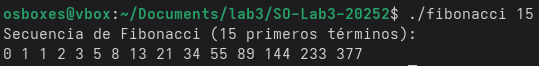

### **Analisis del Diseño (Parte 2)**

#### **Descripcion del mecanismo**

Se esta usando una simple estructura pasada como argumento de entrada para el hilo, esta estructura tiene la forma:
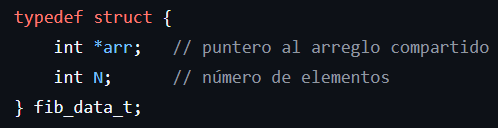

Donde *arr es el puntero al arreglo y N es la cantidad de valores a generar.

Esta estructura es inicializada en el hilo principal y se lo pasamos como argumento a la hora de crear el hilo.
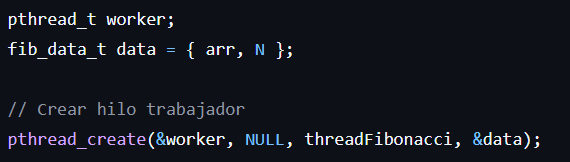

#### **Rol de pthread_join**

En este caso el rol de pthread_join es esperar que el hilo trabajador termine de generar los numeros esperados en la secuencia de fibonacci, por lo tanto este bloquea el main y espera hasta que el worker termine y confirme que termino, esto permitiendo que el main no de un resultado mientras se esta trabajando en ello.